# OpenCV是图像处理的一个强大工具包


https://docs.opencv.org/master/d9/df8/tutorial_root.html


https://docs.opencv.org/master/dd/dd7/tutorial_morph_lines_detection.html Extract horizontal and vertical lines by using morphological operations 重点看一下!!!!


https://docs.opencv.org/master/d9/db0/tutorial_hough_lines.html  检测连续的直线

https://docs.opencv.org/master/de/d3c/tutorial_out_of_focus_deblur_filter.html 恢复一个模糊的图片

https://docs.opencv.org/3.3.1/da/d85/tutorial_js_gradients.html  opencv js 处理


OpenCV的几个用途 

    1)几何变换：有放缩、旋转、投影变换等，实际上是乘一个矩阵使图片上整体的值左右上下移动。
    2)对比度增强。该部分一般要将图片处理为灰度图后处理，通过对灰度值进行线性变换等操作，调整对比度。
    3)图像平滑：平滑的作用即为去除噪声，如一个卷积核每次取平均值(均值平滑)等，这样的作用相当于将局部图片给抹匀。在除去噪声的同时降低了对比度
    4)阈值分割：不同的方法选取不同的一个值，高低这个值的点被处理为最大值(255)和最小值(0)最后形成二值图。
    5)形态学处理：对二值图的黑白部分进行处理，原理和卷积类似，代表操作为膨胀和腐蚀。
    6)边缘检测：图像的边缘是指灰度值发生剧烈变化的位置，利用各种算子可以对边界处理达到不同的效果。 比如美图软件中有将图片转为素描画这种功能，其实使用边缘检测做的。
    7)几何形状的检测和拟合：此部分主要内容为直线、圆的检测，点集的最小外包和轮廓等概念。结合前部分处理后的二值图，可以圈出区域。
    8)颜色空间：RGB、HSV（色调、饱和度、亮度）、HLS（色调、光亮度、饱和度），不同颜色空间的转换可以处理亮度及饱和度等问题。    

# OpenCV对一个白底图片进行文字检测

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# coding:utf8
import numpy as np
import cv2
import sys
import os
import matplotlib.pyplot as plt
from PIL import Image
plt.rcParams['figure.figsize'] = 15, 10

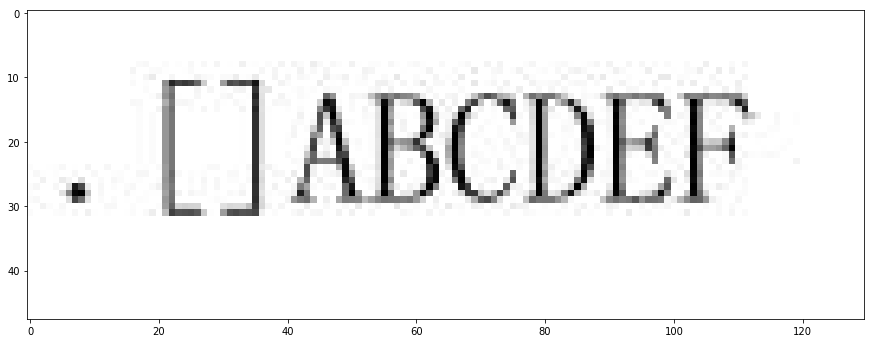

In [4]:
# 读图片的另一种方式
with open("/home/hecong/8.jpg", "rb") as binary_file:
    # Read the whole file at once
    data = binary_file.read()
nparr = np.frombuffer(data, np.uint8)
img_np = cv2.imdecode(nparr,cv2.IMREAD_COLOR)
plt.imshow(img_np,'brg')
plt.show()

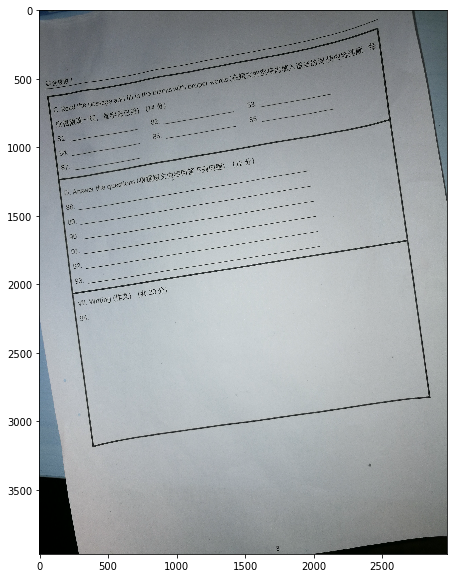

In [54]:
# 读取文件

    # 注意，该方法使图片显示在jupyter notebook 显示的大一些。

# imagePath = '/home/hecong/t001.jpg'
imagePath = '/home/hecong/x001.jpg'
img = cv2.imread(imagePath,cv2.IMREAD_COLOR)
plt.imshow(img,'gray')
plt.show()

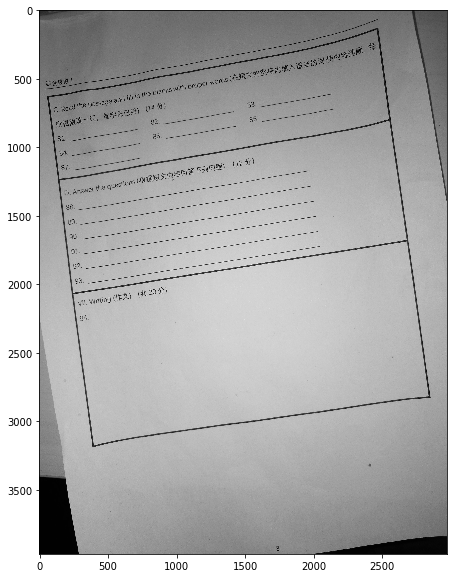

In [55]:
# 转化成灰度图并显示
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 显示一次闭运算后的效果
plt.imshow(gray,'gray')
plt.show()

利用Sobel边缘检测生成二值图
原理：边缘检测的原理是利用灰度变化剧烈的位置，即梯度变化剧烈的位置，Sobel算子利用差分的方法检测出边缘的位置，本质是一个卷积核乘一个矩阵

In [56]:
# 截边
imgl = cv2.bitwise_not(gray)

bw = cv2.adaptiveThreshold(imgl, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                            cv2.THRESH_BINARY, 15, -2)   # 图片转成二进制图片


lines = cv2.HoughLinesP(bw, 1, np.pi / 180, 20, minLineLength=1000, maxLineGap=20)
# plt.imshow(bw,'gray')
# plt.show()
# print(lines)

0.1581736649001223


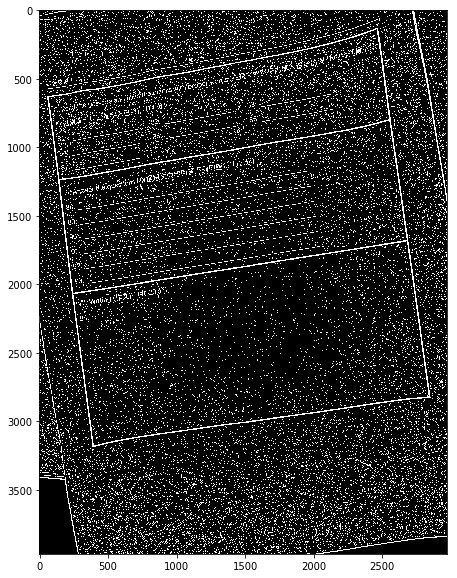

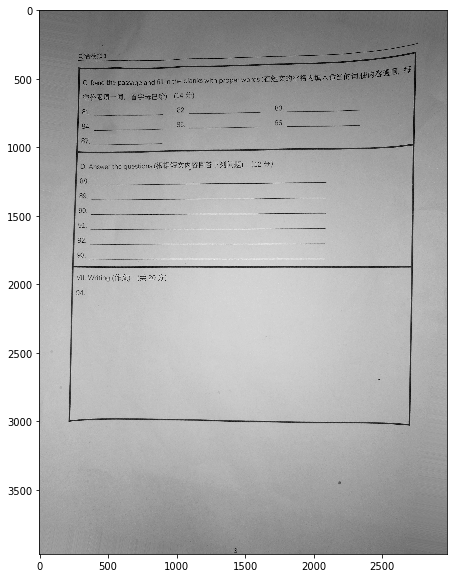

True

In [80]:
# lines = lines[:,0,:]
# exmr = []
# for line in lines:
#     x1, y1, x2, y2 = line
#     cv2.line(imgl, (x1, y1), (x2, y2), (120, 120, 120), 2)
#     width = abs(x2-x1)
#     hight = abs(y2-y1)
#     exmr.append([x1,y1,width,hight, sum((x1,y1,hight,width))])
# print(exmr)  [239, 2066, 2453, 388, 5146]

# 图片旋转
(h,w) = bw.shape[:2]
center = (w//2, h//2)
print(388/2453)
M = cv2.getRotationMatrix2D(center,-9,1.0)
route = cv2.warpAffine(gray,M,(w,h),flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)
plt.imshow(bw,'gray')
plt.show()
plt.imshow(route,'gray')
plt.show()
cv2.imwrite('/home/hecong/xc001.jpg',route)

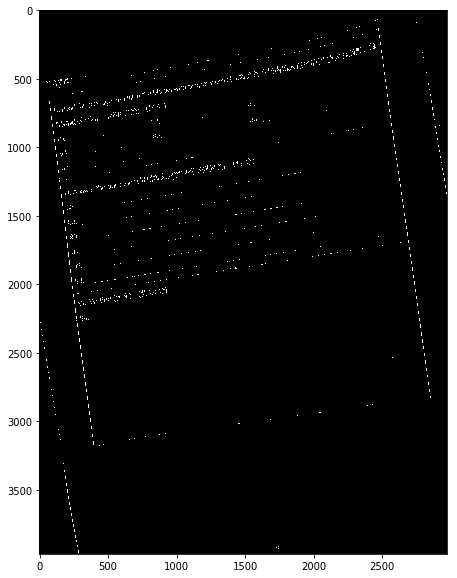

In [12]:
# 此步骤形态学变换的预处理，得到可以查找矩形的图片
# 参数：输入矩阵、输出矩阵数据类型、设置1、0时差分方向为水平方向的核卷积，设置0、1为垂直方向,ksize：核的尺寸

sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize = 3)  
# 二值化
ret, binary = cv2.threshold(sobel, 0, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY)
plt.imshow(binary,'gray')
plt.show()

利用膨胀和腐蚀处理二值图使白色区域更方正
原理：腐蚀和膨胀很像卷积神经网络的池化层，不过腐蚀膨胀左右移动步长为1(为保证图大小不变)，腐蚀是取一个核中最小值、膨胀是取最大值。
所以对一个二值图来说，腐蚀作用是让黑色区域变多，膨胀作用是让白色区域变多。由腐蚀、膨胀作为基本操作可结合出闭运算（先膨胀后腐蚀）、开运算（先腐蚀后膨胀）、顶帽运算（图像减去开运算结果）、底帽运算（图像减去闭运算的结果）

In [14]:
# 设置膨胀和腐蚀操作的核函数
element1 = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 9))
element2 = cv2.getStructuringElement(cv2.MORPH_RECT, (24, 6))

# 膨胀一次，让轮廓突出
dilation = cv2.dilate(binary, element2, iterations = 1)

# 腐蚀一次，去掉细节，如表格线等。注意这里去掉的是竖直的线
erosion = cv2.erode(dilation, element1, iterations = 1)

# aim = cv2.morphologyEx(binary, cv2.MORPH_CLOSE,element1, 1 )   #此函数可实现闭运算和开运算
# 以上膨胀+腐蚀称为闭运算，具有填充白色区域细小黑色空洞、连接近邻物体的作用

# 再次膨胀，让轮廓明显一些
dilation2 = cv2.dilate(erosion, element2, iterations = 3)

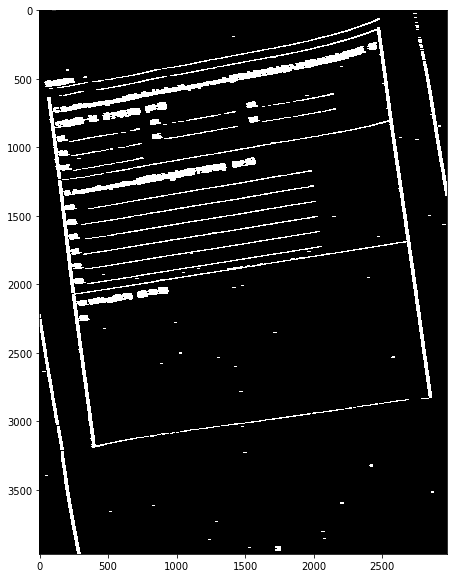

In [15]:
# 显示膨胀一次后的图像处理效果
plt.imshow(dilation,'gray')
plt.show()

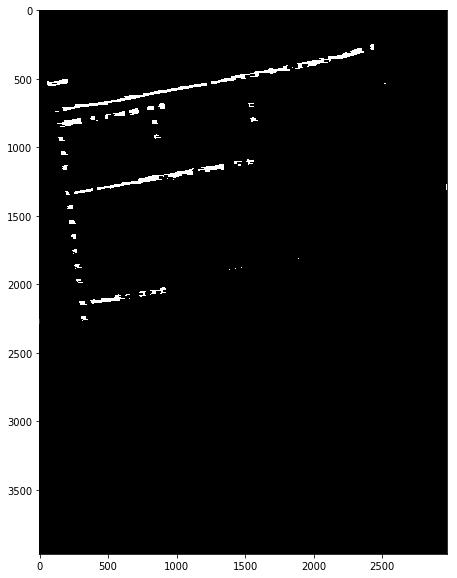

In [16]:
# 显示一次闭运算后的效果
plt.imshow(erosion,'gray')
plt.show()

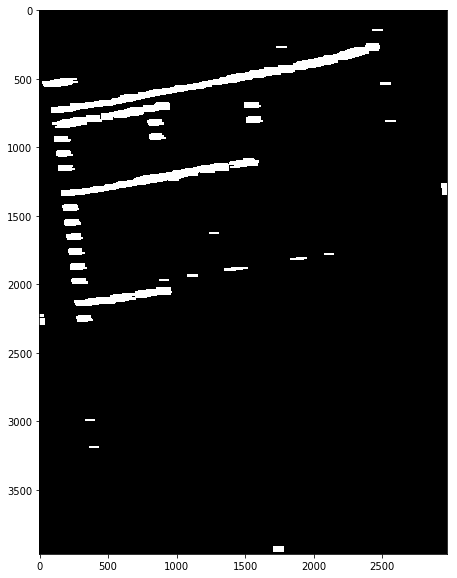

In [17]:
# 显示连续膨胀3次后的效果
plt.imshow(dilation2,'gray')
plt.show()

In [18]:
#  查找和筛选文字区域
region = []
#  查找轮廓
img2, contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)  
# 利用以上函数可以得到多个轮廓区域，存在一个列表中。
#  筛选那些面积小的
for i in range(len(contours)):
    # 遍历所有轮廓
    # cnt是一个点集
    cnt = contours[i]

    # 计算该轮廓的面积
    area = cv2.contourArea(cnt) 

    # 面积小的都筛选掉、这个1000可以按照效果自行设置
    if(area < 1000):
        continue

#     # 将轮廓形状近似到另外一种由更少点组成的轮廓形状，新轮廓的点的数目由我们设定的准确度来决定
#     # 轮廓近似，作用很小
#     # 计算轮廓长度
#     epsilon = 0.001 * cv2.arcLength(cnt, True)

#     # 
# #     approx = cv2.approxPolyDP(cnt, epsilon, True)

    # 找到最小的矩形，该矩形可能有方向
    rect = cv2.minAreaRect(cnt)
    
    # 打印出各个矩形四个点的位置
#     print ("rect is: ")
#     print (rect)

    # box是四个点的坐标
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # 计算高和宽
    height = abs(box[0][1] - box[2][1])
    width = abs(box[0][0] - box[2][0])

    # 筛选那些太细的矩形，留下扁的
    if(height > width * 1.3):
        continue

    region.append(box)

[array([[1721, 3948],
       [1721, 3908],
       [1765, 3908],
       [1765, 3948]]), array([[ 812, 3113],
       [ 810, 3101],
       [ 943, 3081],
       [ 945, 3093]]), array([[ 996, 3086],
       [ 994, 3073],
       [1162, 3048],
       [1164, 3061]]), array([[1166, 3061],
       [1164, 3049],
       [1320, 3029],
       [1321, 3041]]), array([[1324, 3042],
       [1323, 3028],
       [1979, 2938],
       [1981, 2952]]), array([[1992, 2949],
       [1990, 2934],
       [2283, 2896],
       [2285, 2910]]), array([[2319, 2900],
       [2318, 2889],
       [2474, 2865],
       [2476, 2876]]), array([[2480, 2875],
       [2479, 2865],
       [2644, 2842],
       [2645, 2853]]), array([[ 292, 2275],
       [ 286, 2229],
       [ 369, 2218],
       [ 375, 2263]]), array([[ 363, 2161],
       [ 353, 2099],
       [ 677, 2051],
       [ 687, 2113]]), array([[ 719, 2108],
       [ 709, 2045],
       [ 938, 2009],
       [ 948, 2071]]), array([[ 257, 2001],
       [ 251, 1957],
       [ 33

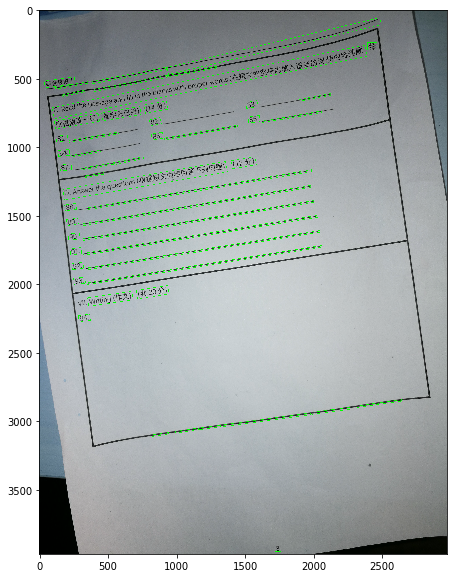

In [21]:
# 用绿线画出这些找到的轮廓
new_box = None
print(region)
for box in region:
#     print(box)
    cv2.drawContours(img, [box], 0, (0, 255, 0), 2)


plt.imshow(img,'brg')
plt.show()

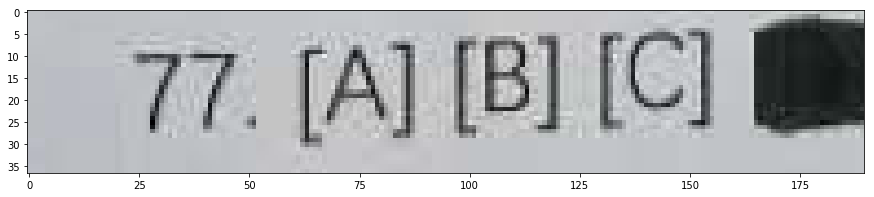

In [46]:
new_box = region[3]
# print(len(region))
# print(new_box)
img = cv2.imread(imagePath)

Xs = [i[0] for i in new_box]
Ys = [i[1] for i in new_box]
x1 = min(Xs)
x2 = max(Xs)
y1 = min(Ys)
y2 = max(Ys)
hight = y2 - y1
width = x2 - x1
# print(img.shape)
crop_img= img[y1:y1+hight, x1:x1+width]
# print(crop_img.shape)
cv2.imwrite('001.png',crop_img)
plt.imshow(crop_img,'brg')
plt.show()

In [14]:
# 另需安装 https://blog.csdn.net/wang_hugh/article/details/80760940
from pytesseract import image_to_string
text = image_to_string('d:\\004.png',lang='eng+osd', config='psm 2 ')
print(text)

71. (A) (8) (C] il 72, #8 (8) (C) (2)


In [51]:
??image_to_string

In [11]:
from aip import AipOcr
APP_ID = '11731829'
API_KEY = 'd8rDek9uPcHCceq8z5SLfSC9'
SECRET_KEY = '11w7NnsEBjwhTulpNOquE5WdK6xDrWvq'

client = AipOcr(APP_ID, API_KEY, SECRET_KEY)

def get_file_content(filePath):
    with open(filePath, 'rb') as fp:
        return fp.read()

# image = get_file_content('/home/hecong/001.png')
# image = get_file_content('/home/hecong/T00_5_11.jpg')
# image = get_file_content('/home/hecong/T00_3_7.jpg')
image = get_file_content('/home/hecong/T00_3_9.jpg')
options = {}
options["language_type"] = "CHN_ENG"
options["detect_direction"] = "true"
options["detect_language"] = "true"
options["probability"] = "true"

ret = client.basicAccurate(image,options)

print(ret)

{'log_id': 7437944114952694320, 'direction': 0, 'words_result_num': 1, 'words_result': [{'words': '17.', 'probability': {'variance': 0.000379, 'average': 0.984236, 'min': 0.956732}}]}


# 数组排序

In [55]:
# https://blog.csdn.net/pipisorry/article/details/51822775
data = np.random.randint(1,30+1,16).reshape(4,4)
print(data)
# data.sort(axis=0)   # 会改变原数据
# print(data)
# print(data.shape)
idex=np.lexsort([data[:,1],data[:,0]]) # 按第一列、第二列进行排序，注意排序参数的顺序
print(idex)
print(data[idex,:])


[[30  7 10  1]
 [26  3 21 24]
 [18 20 24 13]
 [13 26 22 11]]
[3 2 1 0]
[[13 26 22 11]
 [18 20 24 13]
 [26  3 21 24]
 [30  7 10  1]]


# OpenCV  KNN

In [1]:
tesseract 9.jpg stdout -l eng --oem 3 --psm 7

SyntaxError: invalid syntax (<ipython-input-1-26c131020451>, line 1)